# Step 1: Import Libraries

In [20]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
import math

# Step 2: Initialize Qubits to Superposition State

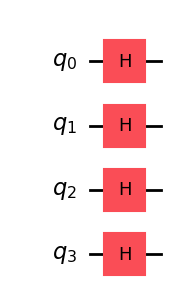

In [21]:
qubits = 4
grover_circ = QuantumCircuit (qubits)

for each in range(qubits):
    grover_circ.h(each)

grover_circ.draw("mpl")

# Step 3: Loop Oracle and Grover's Diffusion

In [22]:
loop = ((math.pi)/4) * math.sqrt(2 ** qubits)

while loop > 1:

    # Tag Solution with Oracle
    grover_circ.x([0, 1, 3])
    grover_circ.h(3)
    grover_circ.mcx([0, 1, 2], 3)  # multi-controlled Toffoli
    grover_circ.h(3)
    grover_circ.x([0, 1, 3])

    # Grover's Diffusion
    grover_circ.h([0, 1, 2, 3])
    grover_circ.x([0, 1, 2, 3])
    grover_circ.h(3)
    grover_circ.mcx([0, 1, 2], 3)  # multi-controlled Toffoli
    grover_circ.h(3)
    grover_circ.x([0, 1, 2, 3])
    grover_circ.h([0, 1, 2, 3])
    loop -= 1

state = Statevector(grover_circ)
print(" ")
print("State of Quantum Circuit: ", state)

 
State of Quantum Circuit:  Statevector([ 0.05078125+6.91416054e-17j,  0.05078125+9.04529544e-17j,
              0.05078125+7.65751666e-17j,  0.05078125+6.91416054e-17j,
             -0.98046875-3.18941786e-16j,  0.05078125+6.22027115e-17j,
              0.05078125+3.44471359e-17j,  0.05078125+2.80029092e-17j,
              0.05078125+9.73918483e-17j,  0.05078125+7.60804993e-17j,
              0.05078125+4.83249237e-17j,  0.05078125+2.47333621e-19j,
              0.05078125+2.75082420e-17j,  0.05078125+7.18622752e-18j,
              0.05078125+1.04330742e-16j,  0.05078125+2.75082420e-17j],
            dims=(2, 2, 2, 2))


# Step 4: Measure Final Quantum Circuit

{'0100': 968, '0010': 3, '1100': 4, '0000': 5, '0001': 3, '1001': 2, '1010': 2, '1101': 4, '0101': 1, '0111': 2, '0110': 1, '1110': 1, '1111': 1, '1000': 1, '0011': 1, '1011': 1}


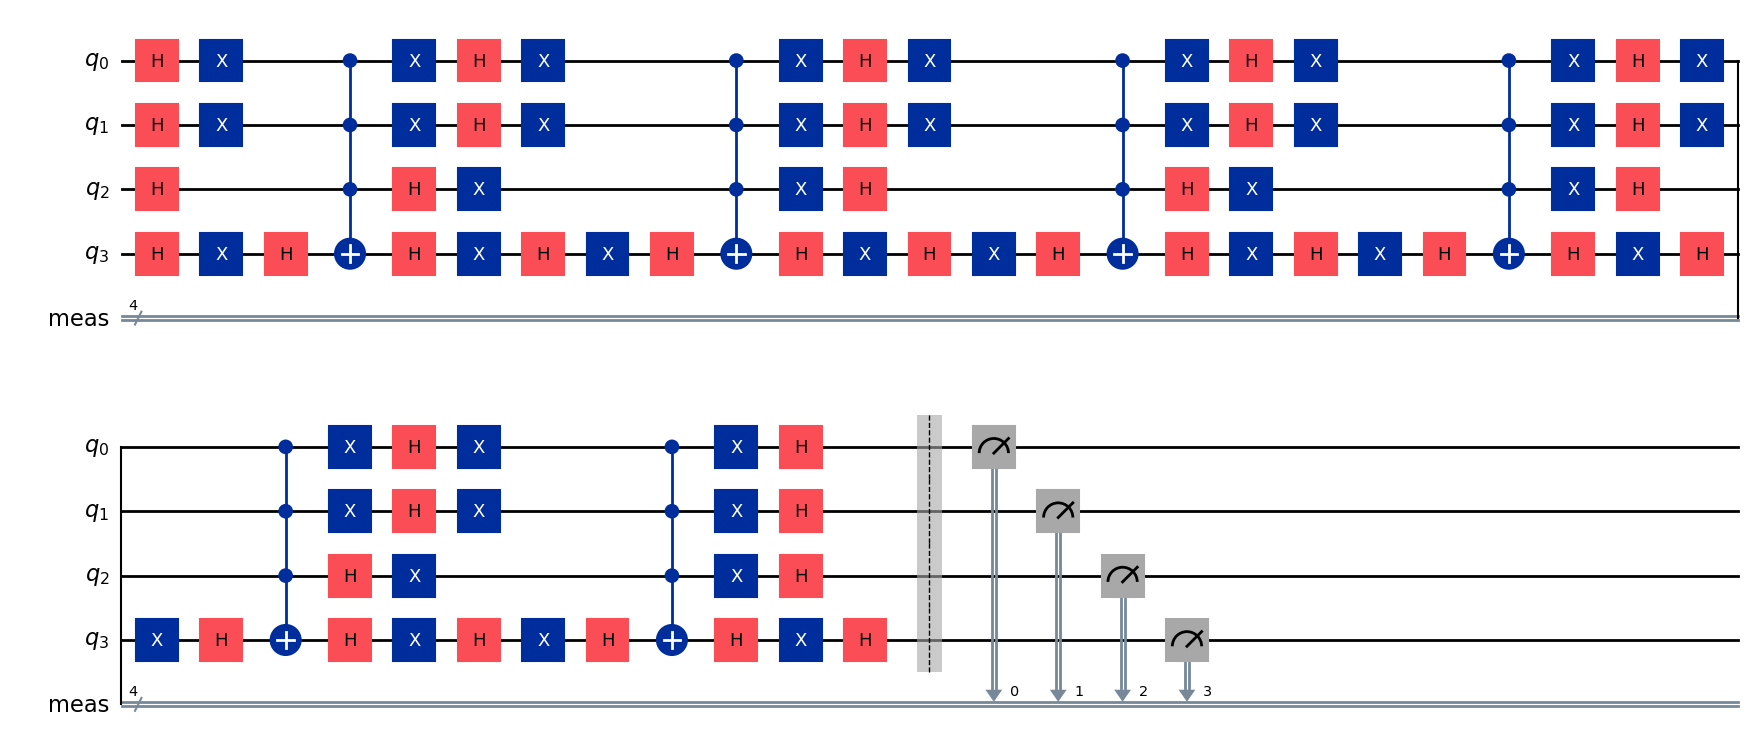

In [23]:
grover_circ.measure_all()

shots = 1000

result = StatevectorSampler().run([grover_circ], shots = 1000).result()

counts = result[0].data.meas.get_counts()

print(counts)

prob_dict = {state: c / shots for state, c in counts.items()}

grover_circ.draw("mpl")

# Step 5: Plot Histogram with Results

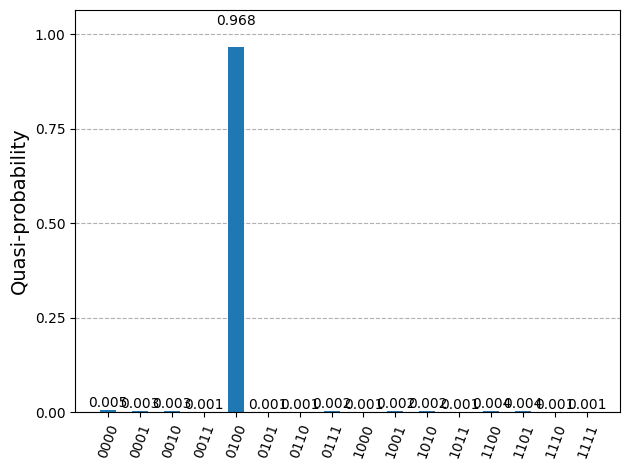

In [24]:
plot_histogram(prob_dict)